In [225]:
#Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [227]:
#import data
file_path = os.path.join("players.csv")
csv = pd.read_csv(file_path,sep =",")
df = pd.DataFrame(csv,columns=csv.columns)
df

,rank,name,rating1,rating2,rating3
0,1,Magnus Carlsen,2837,2819,2883
1,2,Hikaru Nakamura,2804,2734,2837
2,3,Gukesh Dommaraju,2787,2654,2615
3,4,Arjun Erigaisi,2782,2708,2738
4,5,Fabiano Caruana,2776,2756,2782
...,...,...,...,...,...
197537,197604,Jan Dobak,1400,0,1492
197538,197605,Madhava Prahlad Gandham,1400,1475,0
197539,197606,Moaaz Mohamed Elsherif,1400,1500,0
197540,197607,Moshe Maor,1400,1738,1503


In [229]:
#Understanding the Dataset Structure
df.info()
df.shape
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197542 entries, 0 to 197541
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   rank     197542 non-null  int64 
 1   name     197542 non-null  object
 2   rating1  197542 non-null  object
 3   rating2  197542 non-null  int64 
 4   rating3  197542 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.5+ MB


<bound method NDFrame.describe of           rank                      name rating1  rating2  rating3
0            1            Magnus Carlsen    2837     2819     2883
1            2           Hikaru Nakamura    2804     2734     2837
2            3          Gukesh Dommaraju    2787     2654     2615
3            4            Arjun Erigaisi    2782     2708     2738
4            5           Fabiano Caruana    2776     2756     2782
...        ...                       ...     ...      ...      ...
197537  197604                 Jan Dobak    1400        0     1492
197538  197605   Madhava Prahlad Gandham    1400     1475        0
197539  197606    Moaaz Mohamed Elsherif    1400     1500        0
197540  197607                Moshe Maor    1400     1738     1503
197541  197608  Al Monir,Mohamad Ghiyath    1400     1461     1431

[197542 rows x 5 columns]>

In [231]:
#Checking Missing Values
df.isnull().sum()

rank       0
name       0
rating1    0
rating2    0
rating3    0
dtype: int64

In [233]:
#Unique and Distinct Values
unique_rows = df.drop_duplicates()
unique_rows

,rank,name,rating1,rating2,rating3
0,1,Magnus Carlsen,2837,2819,2883
1,2,Hikaru Nakamura,2804,2734,2837
2,3,Gukesh Dommaraju,2787,2654,2615
3,4,Arjun Erigaisi,2782,2708,2738
4,5,Fabiano Caruana,2776,2756,2782
...,...,...,...,...,...
197537,197604,Jan Dobak,1400,0,1492
197538,197605,Madhava Prahlad Gandham,1400,1475,0
197539,197606,Moaaz Mohamed Elsherif,1400,1500,0
197540,197607,Moshe Maor,1400,1738,1503


In [235]:
#Reviewing Data Types
df.dtypes
df['rating1'] = pd.to_numeric(df['rating1'], errors='coerce')
df['rating1'] = df['rating1'].fillna(0).astype('int64')
df.info()
df[df['rating1'] == 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197542 entries, 0 to 197541
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   rank     197542 non-null  int64 
 1   name     197542 non-null  object
 2   rating1  197542 non-null  int64 
 3   rating2  197542 non-null  int64 
 4   rating3  197542 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ MB


,rank,name,rating1,rating2,rating3
158,160,FM,0,2603,0
359,362,IM,0,2544,2574
419,422,IM,0,2532,2525
420,423,IM,0,2532,2528
426,429,IM,0,2531,2310
...,...,...,...,...,...
185924,185991,WCM,0,1451,0
186604,186671,WCM,0,1448,1459
189169,189236,WCM,0,1438,1482
191758,191825,WCM,0,1428,0


<Axes: >

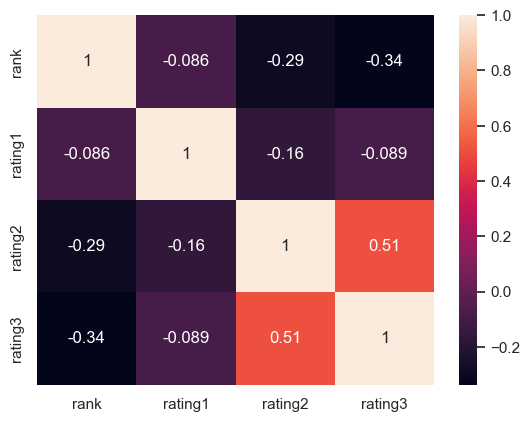

In [237]:
#Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)


<Axes: >

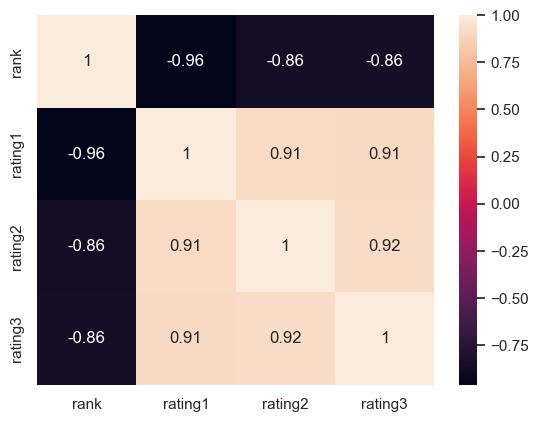

In [239]:
#Correlation Analysis Without 0
df[(df['rating1'] == 0) | (df['rating2'] == 0) | (df['rating3'] == 0)] 
df = df[~((df['rating1'] == 0) | (df['rating2'] == 0) | (df['rating3'] == 0))]
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)


<Axes: xlabel='Classical', ylabel='Rapid'>

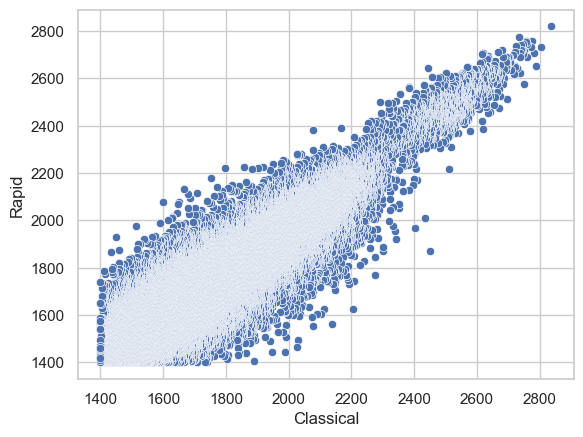

In [241]:
#Visualization for the look
plt.xlabel("Classical")
plt.ylabel("Rapid")
sns.scatterplot(x='rating1', y='rating2', data=df)


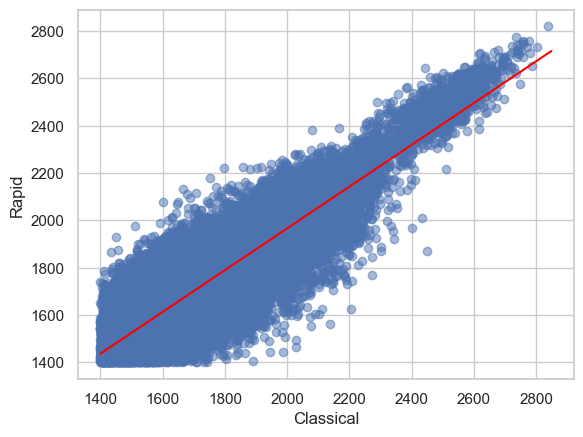

array([[1084.09956]])

In [243]:
#Linear Regression for Prediction
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
x = df['rating1'].values.reshape(-1,1)
y = df['rating2'].values.reshape(-1,1)
linear_reg.fit(x,y)
ratings = []
for i in range(1400,2850):
    ratings.append(i)
array = np.array(ratings).reshape(-1,1)
plt.scatter(x,y,alpha = 0.5)
plt.xlabel("Classical")
plt.ylabel("Rapid")
y_head = linear_reg.predict(array)
plt.plot(array,y_head,color = "red")
plt.show()
linear_reg.predict([[1000]])